In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from scipy.stats import mode
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.utils import to_categorical
from keras.optimizers import Adam
from keras.losses import CategoricalCrossentropy
from keras.metrics import Precision, Recall

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import pyttsx3  # require to install espeak (sudo apt/dnf install espeak)

2023-04-14 03:46:36.065576: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-14 03:46:36.240657: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-14 03:46:36.242180: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-14 03:46:40.089989: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
df = pd.read_csv('../data/all.csv')
X = df[['flex_1', 'flex_2', 'flex_3', 'flex_4', 'flex_5', 'GYRx', 'GYRy', 'GYRz', 'ACCx', 'ACCy', 'ACCz']].values
labels = df.iloc[:, -1]
label_dict = {label: i for i, label in enumerate(sorted(set(labels)))}
y = np.array([label_dict[label] for label in labels])
y = to_categorical(y, num_classes=len(label_dict))

print(label_dict)

print(X.shape, y.shape)
X = np.reshape(X, (X.shape[0]//150, 150, X.shape[1]))
y = np.reshape(y, (y.shape[0]//150, 150, y.shape[1]))
print(X.shape, y.shape)

{'a': 0, 'b': 1, 'bad': 2, 'c': 3, 'd': 4, 'deaf': 5, 'e': 6, 'f': 7, 'fine': 8, 'g': 9, 'good': 10, 'goodbye': 11, 'h': 12, 'hello': 13, 'hungry': 14, 'i': 15, 'j': 16, 'k': 17, 'l': 18, 'm': 19, 'me': 20, 'n': 21, 'no': 22, 'o': 23, 'p': 24, 'please': 25, 'q': 26, 'r': 27, 's': 28, 'sorry': 29, 't': 30, 'thankyou': 31, 'u': 32, 'v': 33, 'w': 34, 'x': 35, 'y': 36, 'yes': 37, 'you': 38, 'z': 39}
(1500000, 11) (1500000, 40)
(10000, 150, 11) (10000, 150, 40)


In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

print(X_train.shape, X_test.shape, X_val.shape)
print(y_train.shape, y_test.shape, y_val.shape)

(8100, 150, 11) (1000, 150, 11) (900, 150, 11)
(8100, 150, 40) (1000, 150, 40) (900, 150, 40)


In [4]:
model = Sequential()
model.add(LSTM(units=64, input_shape=(150, 11), return_sequences=True))
model.add(Dense(units=len(label_dict), activation='softmax'))
model.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=['accuracy', Precision(), Recall()])
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=32)

2023-04-14 03:47:07.366835: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-14 03:47:07.375072: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-14 03:47:07.377322: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Epoch 1/50


2023-04-14 03:47:08.595287: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-14 03:47:08.598670: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-14 03:47:08.601564: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

254/254 [==============================] - ETA: 0s - loss: 2.7826 - accuracy: 0.2821 - precision: 0.9998 - recall: 0.0036

2023-04-14 03:47:32.565664: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-14 03:47:32.570631: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-14 03:47:32.572954: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

254/254 [==============================] - 26s 83ms/step - loss: 2.7826 - accuracy: 0.2821 - precision: 0.9998 - recall: 0.0036 - val_loss: 1.9557 - val_accuracy: 0.4881 - val_precision: 0.9193 - val_recall: 0.0312
Epoch 2/50
254/254 [==============================] - 20s 77ms/step - loss: 1.5857 - accuracy: 0.5753 - precision: 0.9338 - recall: 0.1230 - val_loss: 1.3007 - val_accuracy: 0.6436 - val_precision: 0.9463 - val_recall: 0.2488
Epoch 3/50
254/254 [==============================] - 20s 77ms/step - loss: 1.1408 - accuracy: 0.6778 - precision: 0.9262 - recall: 0.3401 - val_loss: 1.0129 - val_accuracy: 0.7036 - val_precision: 0.9199 - val_recall: 0.4307
Epoch 4/50
254/254 [==============================] - 20s 79ms/step - loss: 0.9354 - accuracy: 0.7199 - precision: 0.9124 - recall: 0.4735 - val_loss: 0.8992 - val_accuracy: 0.7127 - val_precision: 0.9089 - val_recall: 0.4873
Epoch 5/50
254/254 [==============================] - 20s 77ms/step - loss: 0.7967 - accuracy: 0.7547 - pre

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 150, 64)           19456     
                                                                 
 dense (Dense)               (None, 150, 40)           2600      
                                                                 
Total params: 22,056
Trainable params: 22,056
Non-trainable params: 0
_________________________________________________________________


In [6]:
results = model.evaluate(X_test, y_test)
print("Test loss:", results[0])
print("Test accuracy:", results[1])
print("Test precision:", results[2])
print("Test recall:", results[3])

32/32 [==============================] - 1s 34ms/step - loss: 0.1646 - accuracy: 0.9439 - precision: 0.9534 - recall: 0.9349
Test loss: 0.16463488340377808
Test accuracy: 0.943893313407898
Test precision: 0.9534328579902649
Test recall: 0.9348599910736084


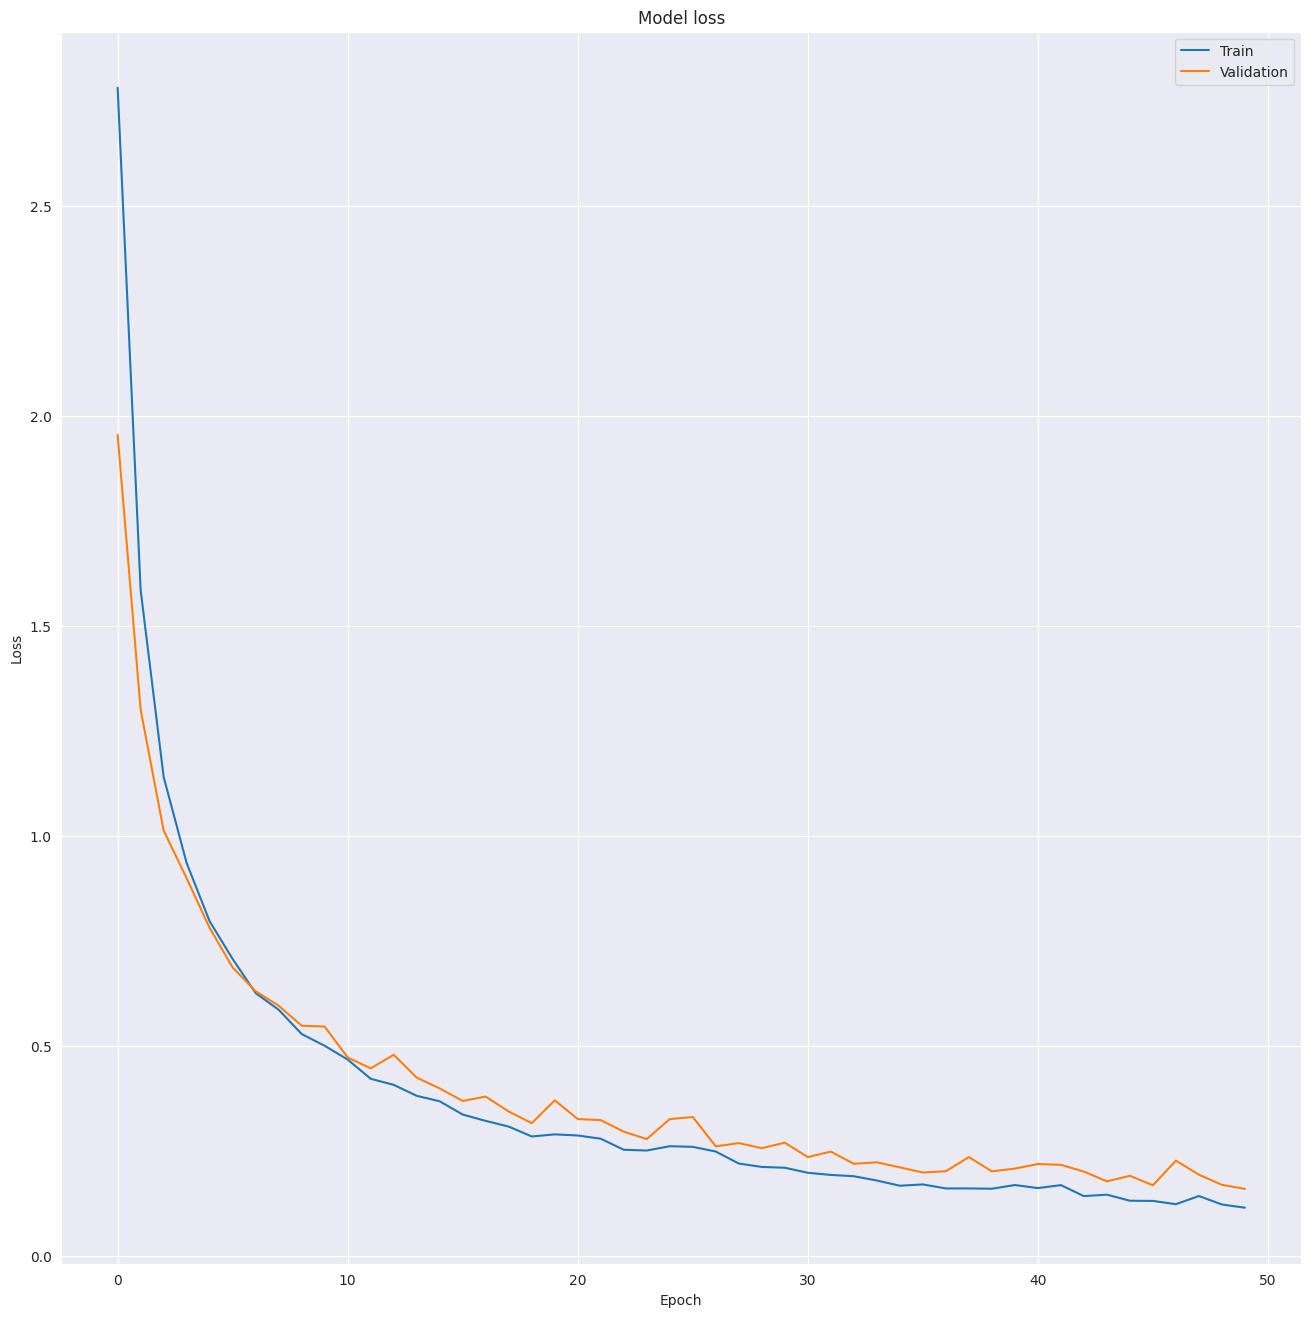

In [7]:
plt.figure(figsize=(16, 16))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

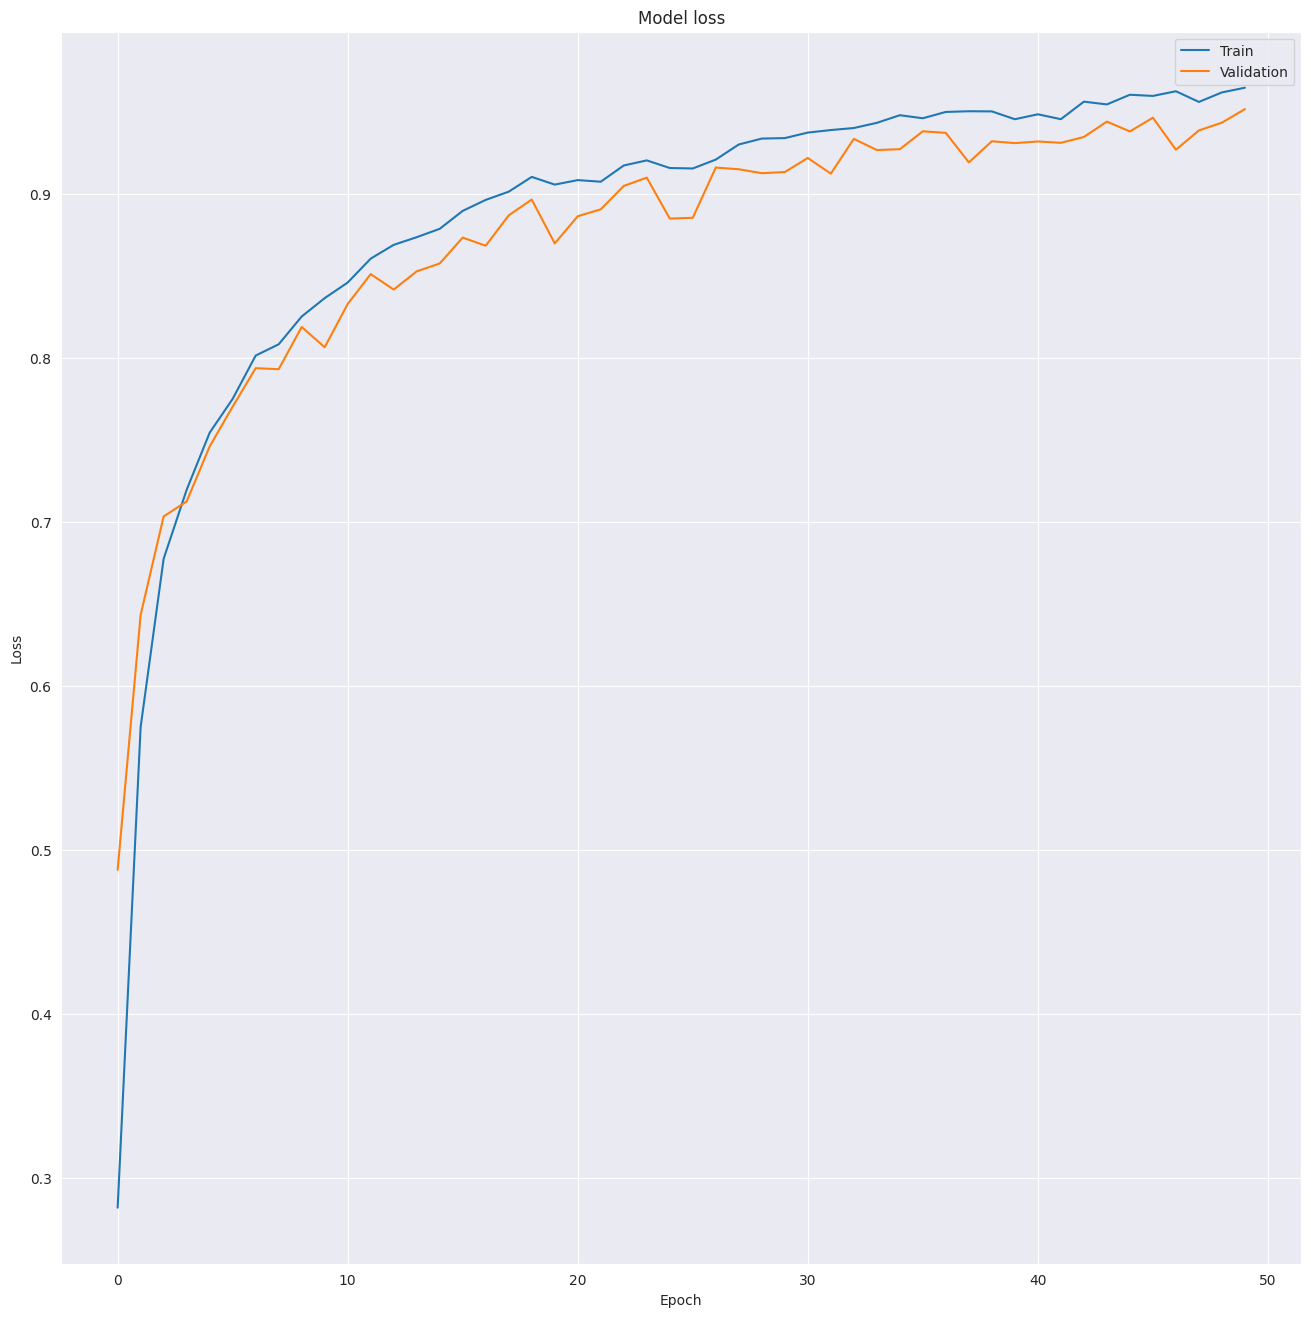

In [8]:
plt.figure(figsize=(16, 16))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [9]:
model.save('../models/all.h5')

In [10]:
y_pred = model.predict(X_test)
predictions = np.argmax(y_pred, axis=2)
print(predictions)
major = mode(predictions, axis=1)[0].squeeze()
count = mode(predictions, axis=1)[1].squeeze()
print(f"Predictions    : {major}")
print(f"Appeared times : {count}")

2023-04-14 04:04:17.672005: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-14 04:04:17.674905: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-14 04:04:17.677284: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

32/32 [==============================] - 2s 27ms/step
[[39 39 39 ... 39 39 39]
 [10  2  2 ...  2  2  2]
 [19 21 21 ... 21 21 21]
 ...
 [ 8 31 31 ... 31 31 31]
 [13 13 13 ... 13 13 13]
 [18 18 18 ... 18 18 18]]
Predictions    : [39  2 21 13 19 13 27  0 14  4 29  2 12  7 31  4 28 10 39 24 37 36 36  2
 23  8 14 36 30  6  8 22 34 23  8 21 11 39 25 35 13  4 14  5 18  4  1 20
 26 38 19  2 30 19 35 10 35  7 23 30 11 14 12 17 18 28 29 24 35 12 19 31
 25 16 19 27 27  2 27  3 39 24 24 39 20 13 17 32 32 27 35 13  4 39 29 28
 11 34 10  4 14 33 17 16  6 26 20 39  8 13  8 13  0  8 38 28  6 14 13 12
  1 33 29 25 24 37 30 15 13  6 37  8 18 30 28 33 16  2  5 31 18 30 18  4
  2  4 34 20 23 13  0  4 33  6  9 16 17  4 12 11  3 32 38 10  9 17  6 16
 23 35 30 32 39 11 14 38 34 26 18  5  5 38 17 37 36 10 34  4 16  5  0  7
 20 17 15 18  9 14 27  5 31  6 39 30  0 15 38 18 13  5  4 10 39 28 11 12
 17 31 27 10 36 20 32 23 21 30  0 27 35 28 24  1 23  8 11 31  5  2 12  1
 32 33 15 33 27 38  6 22 33  3 34 16 34 30 

/tmp/ipykernel_36639/310183563.py:4: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  major = mode(predictions, axis=1)[0].squeeze()
/tmp/ipykernel_36639/310183563.py:5: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  count = mode(predictions, axis=1)[1].squeeze()


In [11]:
def get_key(dictionary, val):
    for key, value in dictionary.items():
        if val == value:
            return key

predictions_list = []
for word in major:
    predictions_list.append(get_key(label_dict, word))
print(predictions_list)

['z', 'bad', 'n', 'hello', 'm', 'hello', 'r', 'a', 'hungry', 'd', 'sorry', 'bad', 'h', 'f', 'thankyou', 'd', 's', 'good', 'z', 'p', 'yes', 'y', 'y', 'bad', 'o', 'fine', 'hungry', 'y', 't', 'e', 'fine', 'no', 'w', 'o', 'fine', 'n', 'goodbye', 'z', 'please', 'x', 'hello', 'd', 'hungry', 'deaf', 'l', 'd', 'b', 'me', 'q', 'you', 'm', 'bad', 't', 'm', 'x', 'good', 'x', 'f', 'o', 't', 'goodbye', 'hungry', 'h', 'k', 'l', 's', 'sorry', 'p', 'x', 'h', 'm', 'thankyou', 'please', 'j', 'm', 'r', 'r', 'bad', 'r', 'c', 'z', 'p', 'p', 'z', 'me', 'hello', 'k', 'u', 'u', 'r', 'x', 'hello', 'd', 'z', 'sorry', 's', 'goodbye', 'w', 'good', 'd', 'hungry', 'v', 'k', 'j', 'e', 'q', 'me', 'z', 'fine', 'hello', 'fine', 'hello', 'a', 'fine', 'you', 's', 'e', 'hungry', 'hello', 'h', 'b', 'v', 'sorry', 'please', 'p', 'yes', 't', 'i', 'hello', 'e', 'yes', 'fine', 'l', 't', 's', 'v', 'j', 'bad', 'deaf', 'thankyou', 'l', 't', 'l', 'd', 'bad', 'd', 'w', 'me', 'o', 'hello', 'a', 'd', 'v', 'e', 'g', 'j', 'k', 'd', 'h',

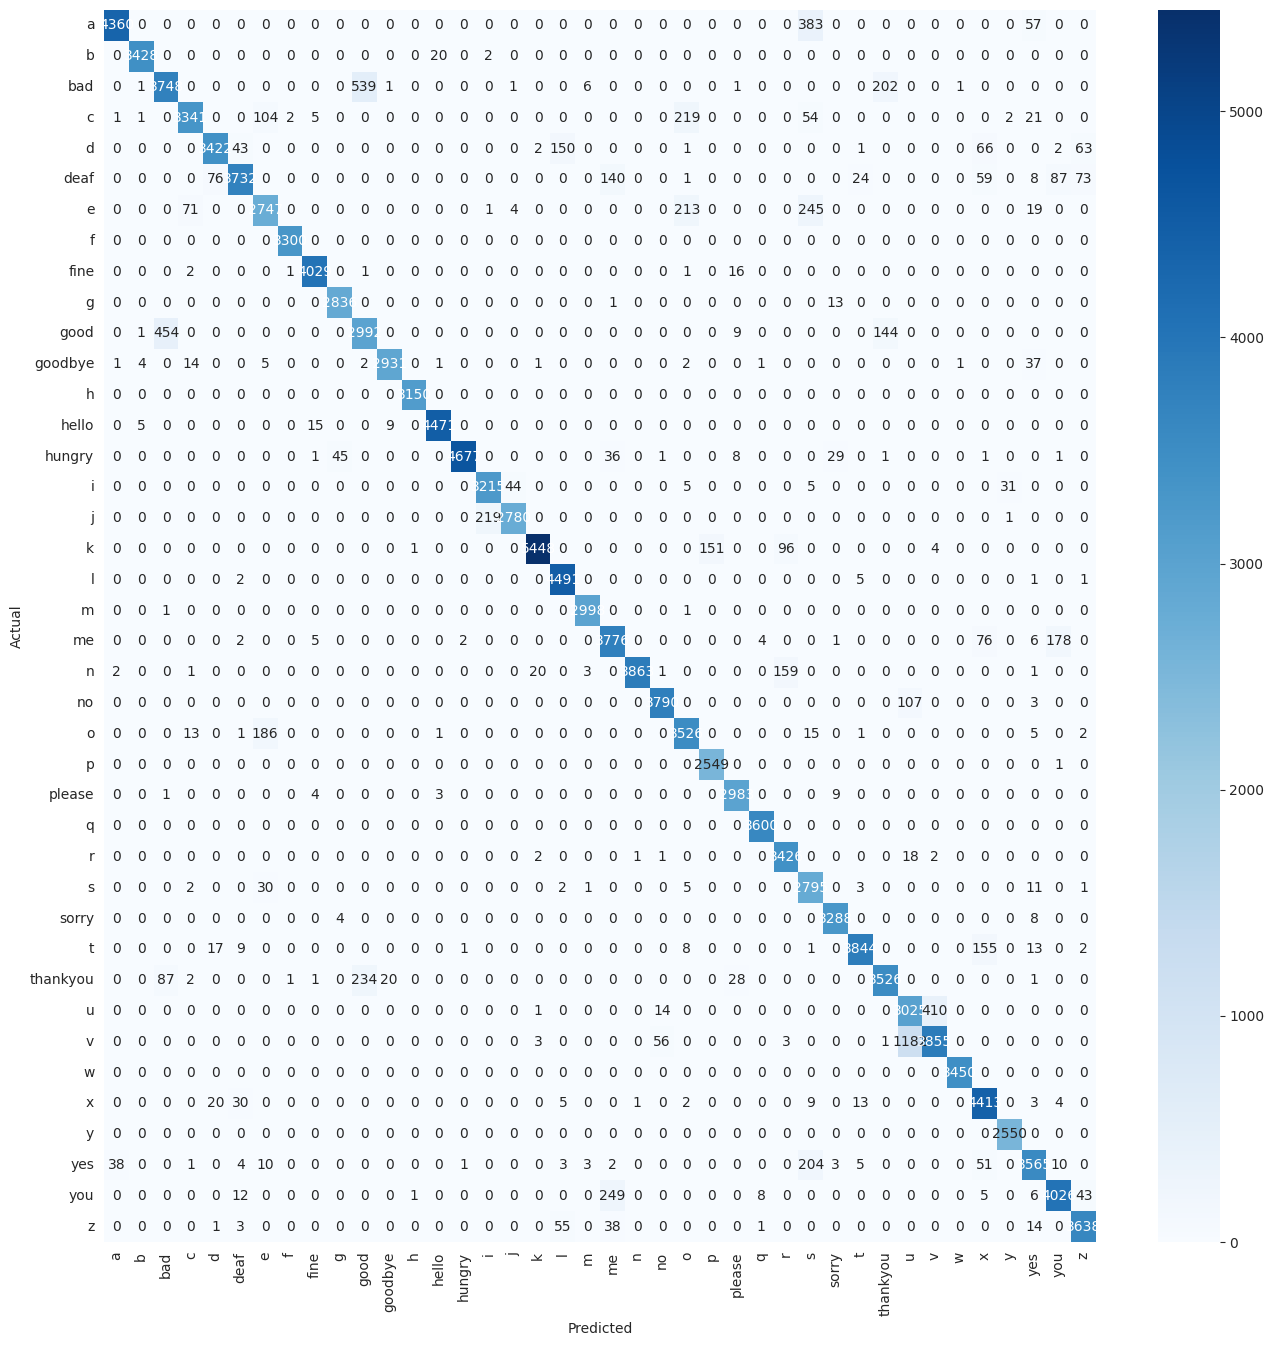

Accuracy: 94.39%


In [12]:
words_cm = confusion_matrix(y_test.argmax(axis=2).flatten(), y_pred.argmax(axis=2).flatten())
plt.subplots(figsize=(16, 16))
sns.heatmap(words_cm, annot=True, cmap='Blues', fmt='g', xticklabels=label_dict.keys(), yticklabels=label_dict.keys())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
accuracy = np.sum(np.diag(words_cm)) / np.sum(words_cm)
print(f"Accuracy: {accuracy*100:.2f}%")

In [13]:
print(classification_report(y_test.argmax(axis=2).flatten(), y_pred.argmax(axis=2).flatten()))

              precision    recall  f1-score   support

           0       0.99      0.91      0.95      4800
           1       1.00      0.99      1.00      3450
           2       0.87      0.83      0.85      4500
           3       0.97      0.89      0.93      3750
           4       0.97      0.91      0.94      3750
           5       0.97      0.89      0.93      4200
           6       0.89      0.83      0.86      3300
           7       1.00      1.00      1.00      3300
           8       0.99      0.99      0.99      4050
           9       0.98      1.00      0.99      2850
          10       0.79      0.83      0.81      3600
          11       0.99      0.98      0.98      3000
          12       1.00      1.00      1.00      3150
          13       0.99      0.99      0.99      4500
          14       1.00      0.97      0.99      4800
          15       0.94      0.97      0.95      3300
          16       0.98      0.93      0.95      3000
          17       0.99    

In [ ]:
engine = pyttsx3.init()
engine.say(", ".join(predictions_list))
engine.runAndWait()